In [5]:
#pip install openpyxl
#pip install imblearn

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from downloads
df = pd.read_excel(r'C:\Users\RiRi\Downloads\Task 3 and 4_Loan_Data.xlsx')
df.head(5)

customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [4]:
# Duplicates data check

df.duplicated().sum()

0

In [5]:
df_process = df.drop_duplicates()

In [6]:
# Checking for NULL entries

df_process.isnull().sum()

# No null entries found

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

Text(0, 0.5, 'Frequency')

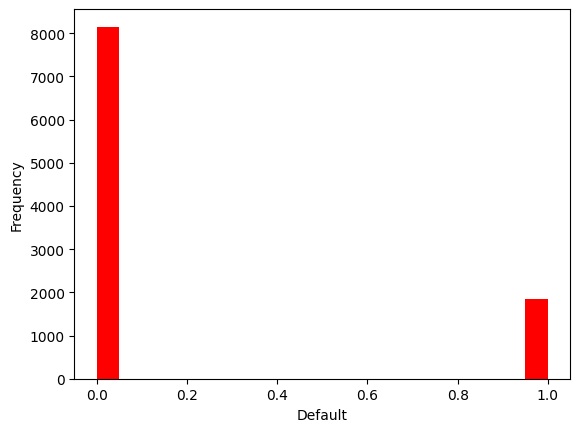

In [7]:
## Histogram with detailed labels
x = df['default']
plt.hist(x, bins = 20, color = 'r')
plt.xlabel("Default")
plt.ylabel('Frequency')

# Data is Unbalanced.

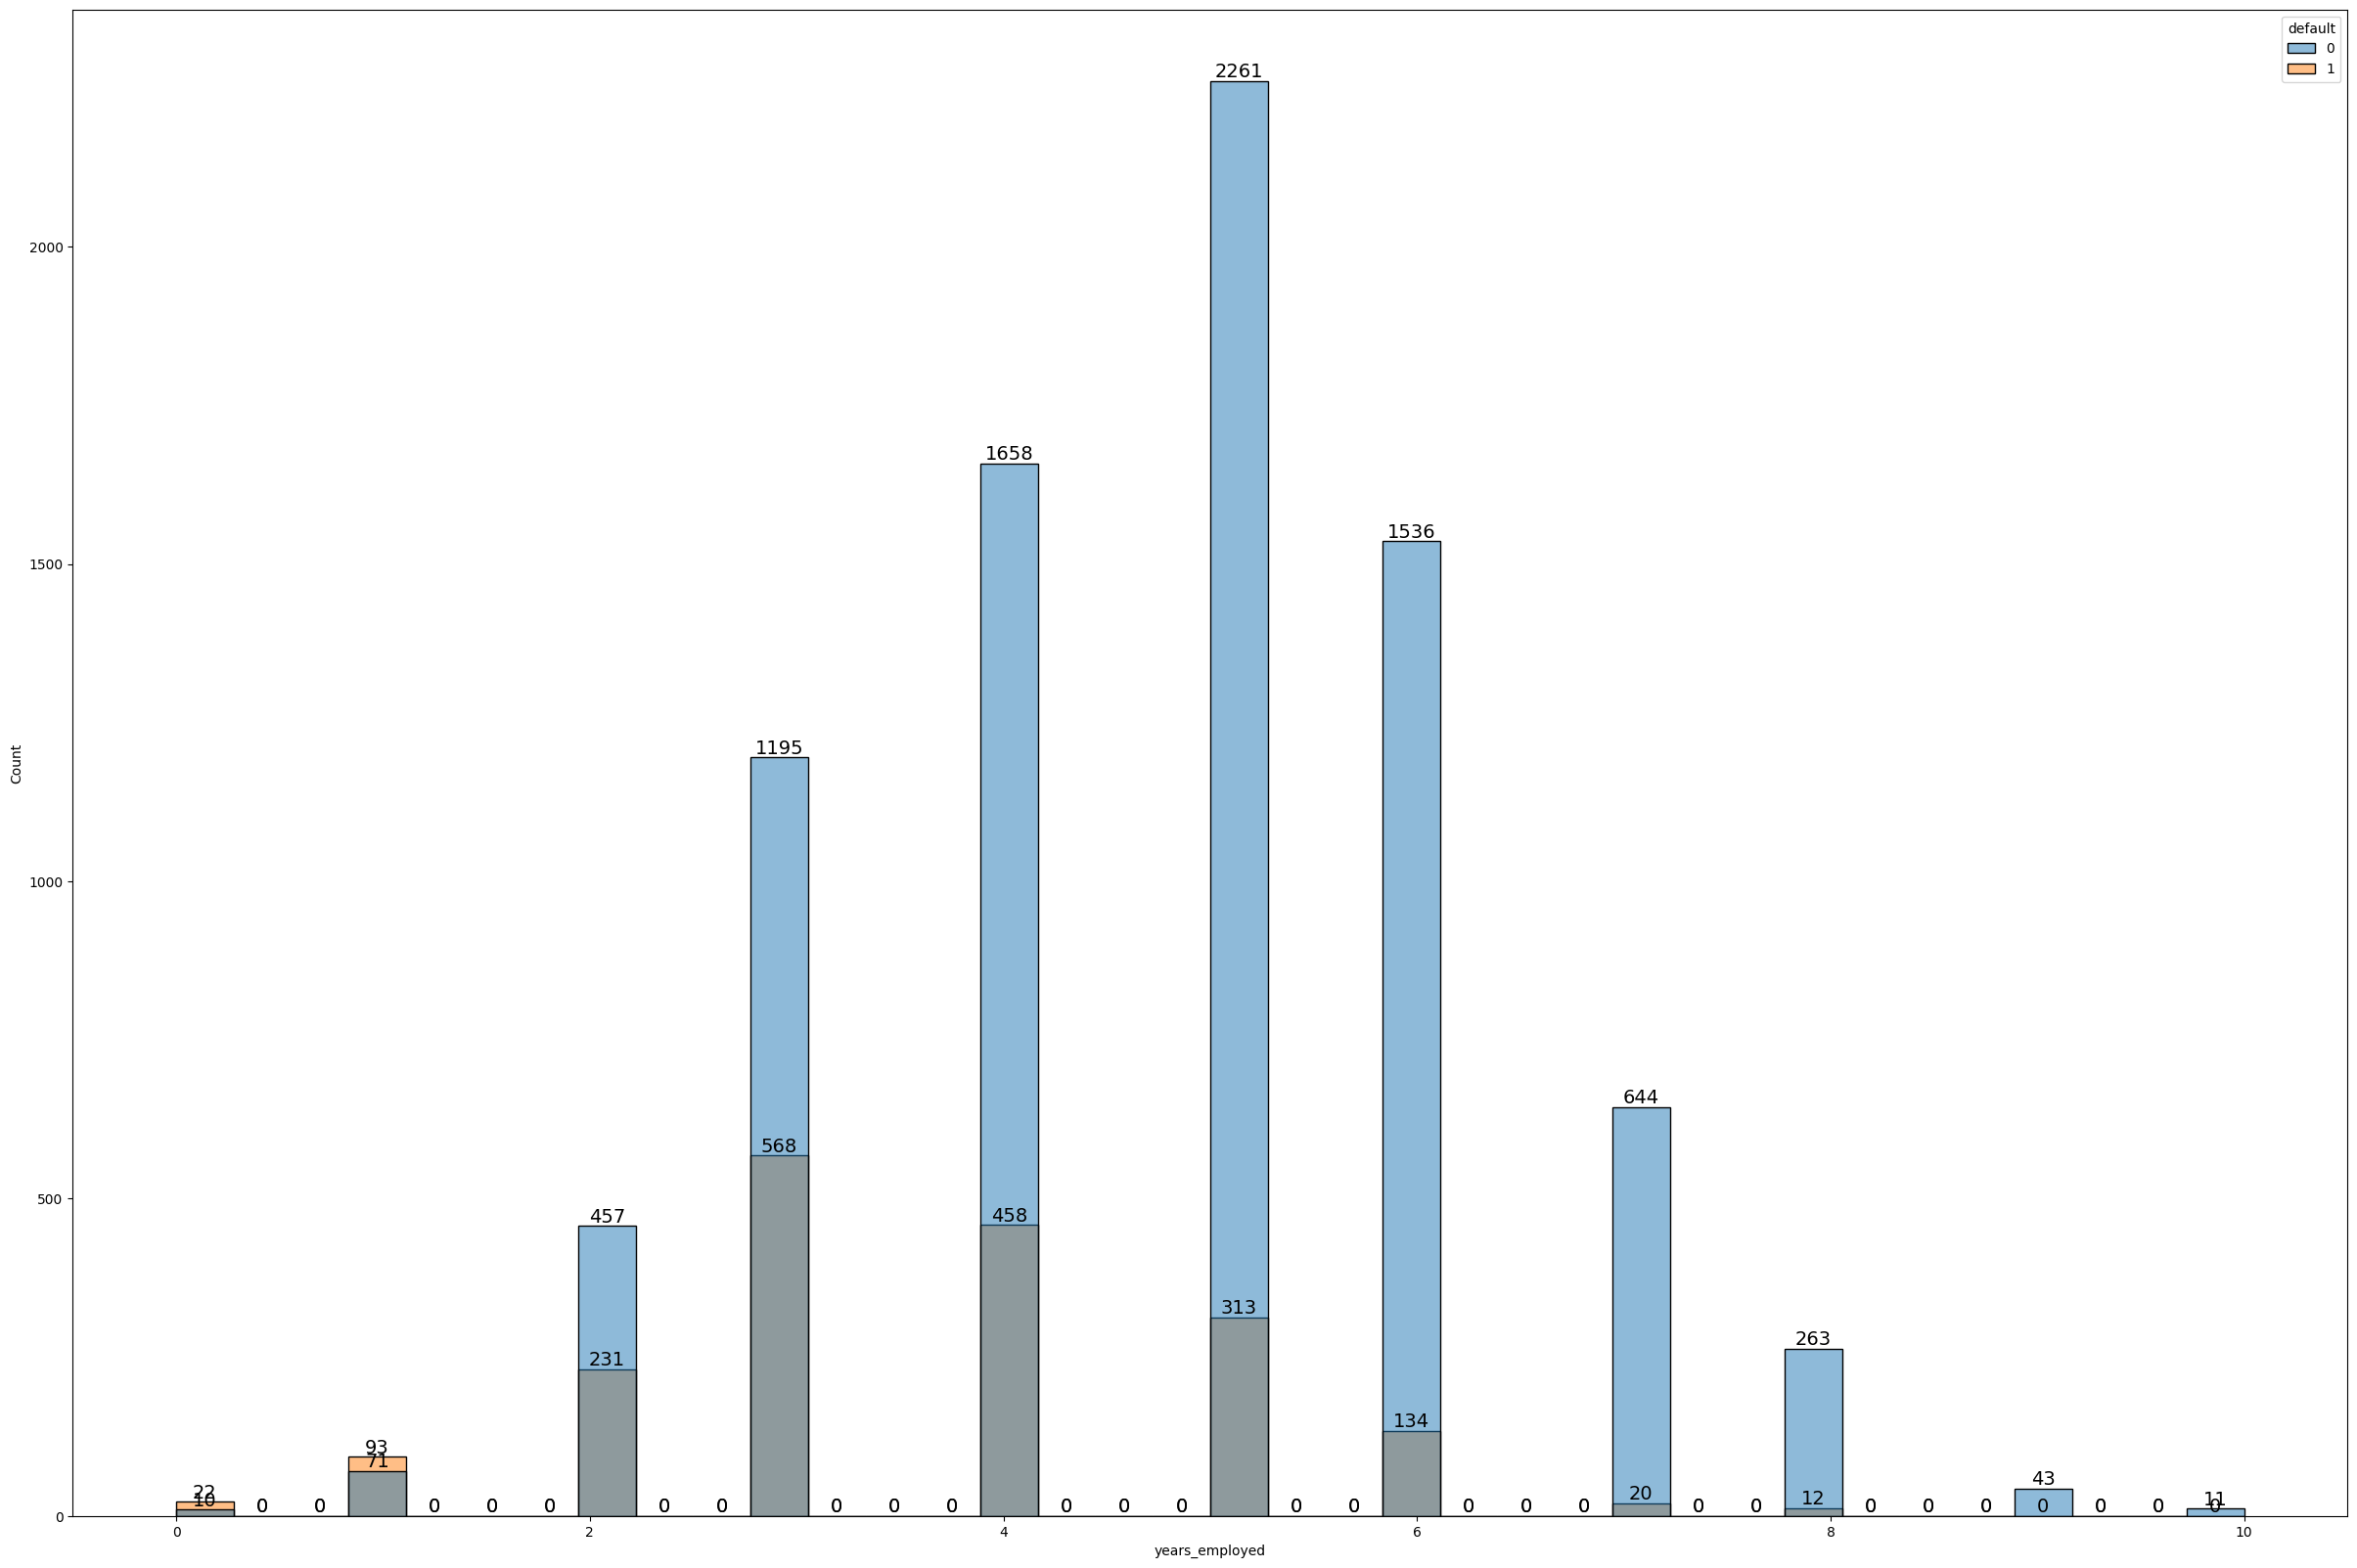

In [8]:
plt.figure(figsize=(30, 20))
ax=sns.histplot(data = df_process, x = 'years_employed', hue = 'default')
for p in ax.patches:
    # Get the height and position of each patch (bar)
    height = p.get_height()
    # If height is NaN (empty bar), continue to next bar
    if not np.isnan(height):
        # Place text at the top of the bar
        ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha="center", va="bottom", fontsize=14)

plt.show()

<Axes: >

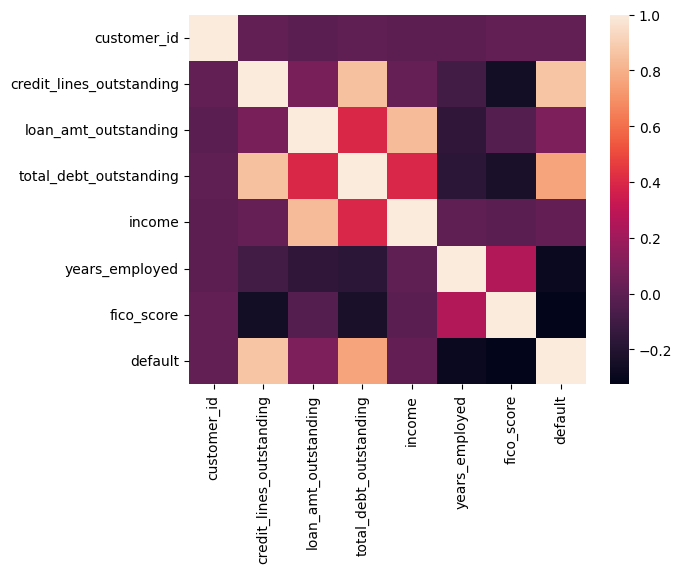

In [9]:
# Correlation matrix
var = ['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income',
       'years_employed', 'fico_score', 'default']


my_corr_matrix = df_process[var].corr()

# heatmap

sns.heatmap(my_corr_matrix )

In [10]:
'''It increased the accuracy. Not asked so removed it.'''

#import warnings
#warnings.filterwarnings('ignore')


#num_var = ['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']

#numerical_data = df_process[num_var]

# Initialize StandardScaler
#scaler = StandardScaler()

# Fit and transform the numerical features using StandardScaler
#scaled_numerical_data = scaler.fit_transform(numerical_data)

# Replace the original numerical features in the DataFrame with the scaled features
#df_process[num_var] = scaled_numerical_data

#df_process

'It increased the accuracy. Not asked so removed it.'

In [11]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [12]:
# Change 'default' column from int to string
#df_model['default'] = df_model['default'].astype(str)

# Check the data types
#print(df_model.dtypes)

In [15]:
from sklearn.model_selection import train_test_split

y = df_process['default']

X = df_process.drop('default' , axis =1)

#spliting the data into test and train

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=22)

# Fit and apply SMOTE on the training data
X_train, y_train = smote.fit_resample(X_tr, y_tr)

In [16]:
#Naive Bayes

In [17]:
# Training the Model
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()
g_nb.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred_gnb = g_nb.predict(X_test)

# Model Validation:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate accuracy

print("Naive Bayes Model Train Accuracy is:", g_nb.score(X_train, y_train))
print("Naive Bayes Model Test Accuracy is:", g_nb.score(X_test, y_test))

my_matrix_NB = confusion_matrix(y_test, y_pred_gnb)
print(my_matrix_NB)

print("TP is:", my_matrix_NB[1,1])
print("TN is:", my_matrix_NB[0,0])
print("FP is:", my_matrix_NB[0,1])
print("FN is:", my_matrix_NB[1,0])



print('Precision score:', precision_score(y_test, y_pred_gnb))
print('Recall score:', recall_score(y_test, y_pred_gnb))
print('Accuracy score:', accuracy_score(y_test, y_pred_gnb))
print('F1 score:', f1_score(y_test, y_pred_gnb))

Naive Bayes Model Train Accuracy is: 0.9138063721717716
Naive Bayes Model Test Accuracy is: 0.9145
[[1520  132]
 [  39  309]]
TP is: 309
TN is: 1520
FP is: 132
FN is: 39
Precision score: 0.7006802721088435
Recall score: 0.8879310344827587
Accuracy score: 0.9145
F1 score: 0.7832699619771863


In [25]:
#KNN

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define function

knn = KNeighborsClassifier() # by default euclidean distance p = 2

# define a list of parameters
param_knn = {'n_neighbors': range(1, 26) }  # from 1 to 25

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(X_train, y_train)

# the best hyperparameter chosen:
print(grid_knn.best_params_)


{'n_neighbors': 1}


In [27]:
# Taking k as 1 from the grid search we have the below KNN model:

knn2 = KNeighborsClassifier(n_neighbors = 1)

knn2.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [28]:
knn2.predict(X_test)

# Calculate accuracy

print("KNN Model Train Accuracy is:", knn2.score(X_train, y_train))
print("KNN Model Test Accuracy is:", knn2.score(X_test, y_test))

KNN Model Train Accuracy is: 1.0
KNN Model Test Accuracy is: 0.9035


In [29]:
#Logistic regression

In [30]:
#comparing ratios of 1's
print(np.mean(y_train), np.mean(y)) 

0.5 0.1851


In [31]:
from sklearn.linear_model import LogisticRegression
# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#print(logreg.coef_)
#print(logreg.intercept_)
## (b) Accuracy

print("Log reg Train Accuracy is:", logreg.score(X_train, y_train))
print("Log reg Test Accuracy is:", logreg.score(X_test, y_test))

# Report coefficients
print("Logistic Regression Coefficients:", logreg.coef_)
print("Logistic Regression Intercept:", logreg.intercept_)

Log reg Train Accuracy is: 0.9826843158380791
Log reg Test Accuracy is: 0.9835
Logistic Regression Coefficients: [[ 1.10677688e-07  1.32141427e-05  9.85254844e-04  1.95156372e-03
  -4.39282872e-04 -5.13403974e-05 -1.99297392e-03]]
Logistic Regression Intercept: [4.81695005e-07]


In [32]:
from sklearn.metrics import confusion_matrix

y_test_pred = logreg.predict(X_test)

my_matrix = confusion_matrix(y_test, y_test_pred)
print(my_matrix)
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

[[1631   21]
 [  12  336]]
TP is: 336
TN is: 1631
FP is: 21
FN is: 12


In [33]:
#Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_full = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

dt_full.fit(X_train, y_train)
dt_full.score(X_train, y_train), dt_full.score(X_test, y_test)

(1.0, 0.9915)

In [35]:
dt_y = dt_full.feature_importances_ 

dt_y

array([0.00439878, 0.8909859 , 0.00165073, 0.00926967, 0.00435431,
       0.07513071, 0.01420989])

In [36]:
dt_3 = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 4)
dt_3.fit(X_train, y_train)

print("DT Train accuracy score: ",dt_3.score(X_train, y_train))
print("DT Test accuracy score: ",dt_3.score(X_test, y_test))

DT Train accuracy score:  0.9874557488071417
DT Test accuracy score:  0.9855


In [37]:
from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# go through all possible combinations: 9*9*9 models, with 5 fold cv
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), # improper way to specify, should be a larger number
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [38]:
grid_tree.best_params_

{'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [39]:
dt_4 = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 4, max_leaf_nodes = 9 , min_samples_split = 2)
dt_4.fit(X_train, y_train)

print("DT Train accuracy score: ",dt_4.score(X_train, y_train))
print("DT Test accuracy score: ",dt_4.score(X_test, y_test))

DT Train accuracy score:  0.9865322456518393
DT Test accuracy score:  0.9845


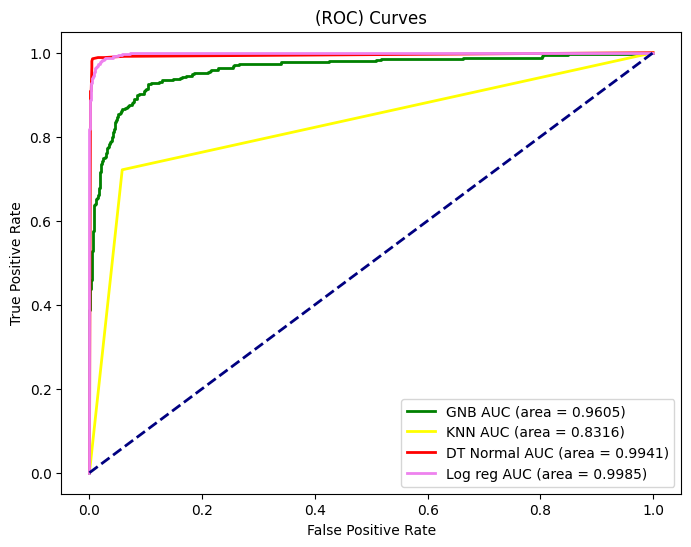

In [44]:

from sklearn.metrics import roc_curve, auc


# Get predicted probabilities for Gaussian Naive Bayes
y_prob_gnb = g_nb.predict_proba(X_test)[:, 1]

# Calculate Gaussian Naive Bayes ROC curve
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)


# Get predicted probabilities for KNN
y_prob_KNN = knn2.predict_proba(X_test)[:, 1]

# Calculate KNN ROC curve
fpr_knn2, tpr_knn2, thresholds_knn2 = roc_curve(y_test, y_prob_KNN)
roc_auc_knn2 = auc(fpr_knn2, tpr_knn2)


# Get predicted probabilities for DT normal
y_prob_DT = grid_tree.predict_proba(X_test)[:, 1]

# Calculate DT ROC curve
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_prob_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)


# Get predicted probabilities for Log reg
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Calculate Log reg ROC curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)


# Plot ROC curves on the same graph
plt.figure(figsize=(8, 6))

plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label=f'GNB AUC (area = {roc_auc_gnb:.4f})')
plt.plot(fpr_knn2, tpr_knn2, color='yellow', lw=2, label=f'KNN AUC (area = {roc_auc_knn2:.4f})')
plt.plot(fpr_DT, tpr_DT, color='red', lw=2, label=f'DT Normal AUC (area = {roc_auc_DT:.4f})')
plt.plot(fpr_logreg, tpr_logreg, color='violet', lw=2, label=f'Log reg AUC (area = {roc_auc_logreg:.4f})')



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [45]:
'''From above ML algos, I suggest using Decision Tree or Logistic regression due to high Accuracy. 
Trained data in the above models can be used directly by just pluging in non-predicted data.'''

'From above ML algos, I suggest using Decision Tree or Logistic regression due to high Accuracy. \nTrained data in the above models can be used directly by just pluging in non-predicted data.'

In [46]:
# Predict probabilities on the full dataset
df_process['probability_of_default'] = logreg.predict_proba(X)[:, 1]

# Calculate expected loss
recovery_rate = 0.10
df_process['expected_loss'] = df_process['probability_of_default'] * (1 - recovery_rate) * df_process['total_debt_outstanding']

# Calculate total expected loss
total_expected_loss = df_process['expected_loss'].sum()
print(f'Total Expected Loss from Logistic regression is ${total_expected_loss:.2f}')

# Display the DataFrame with expected loss for each loan
#print(df[['customer_id', 'expected_loss']])

Total Expected Loss from Logistic regression is $33443690.02


In [47]:
# Predict probabilities on the full dataset
df_process['probability_of_default'] = grid_tree.predict_proba(X)[:, 1]

# Calculate expected loss
recovery_rate = 0.10
df_process['expected_loss'] = df_process['probability_of_default'] * (1 - recovery_rate) * df_process['total_debt_outstanding']

# Calculate total expected loss
total_expected_loss = df_process['expected_loss'].sum()
print(f'Total Expected Loss from Decision tress is ${total_expected_loss:.2f}')

Total Expected Loss from Decision tress is $32889373.82


In [48]:
# Predict probabilities on the full dataset
df_process['probability_of_default'] = knn2.predict_proba(X)[:, 1]

# Calculate expected loss
recovery_rate = 0.10
df_process['expected_loss'] = df_process['probability_of_default'] * (1 - recovery_rate) * df_process['total_debt_outstanding']

# Calculate total expected loss
total_expected_loss = df_process['expected_loss'].sum()
print(f'Total Expected Loss from KNN is ${total_expected_loss:.2f}')

Total Expected Loss from KNN is $31390152.79


In [49]:
# Predict probabilities on the full dataset
df_process['probability_of_default'] = g_nb.predict_proba(X)[:, 1]

# Calculate expected loss
recovery_rate = 0.10
df_process['expected_loss'] = df_process['probability_of_default'] * (1 - recovery_rate) * df_process['total_debt_outstanding']

# Calculate total expected loss
total_expected_loss = df_process['expected_loss'].sum()
print(f'Total Expected Loss from Naive Bayes is ${total_expected_loss:.2f}')

Total Expected Loss from Naive Bayes is $40112504.25


In [ ]:
# expected losses from each model is given above. 